# Exercise 13

This particular Automobile Data Set includes a good mix of categorical values as well as continuous values and serves as a useful example that is relatively easy to understand. Since domain understanding is an important aspect when deciding how to encode various categorical values - this data set makes a good case study.

Read the data into Pandas

In [1]:
import pandas as pd

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [2]:
df.shape

(205, 26)

In [3]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [4]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [5]:
numeric_df = df.select_dtypes(include=['float64','int64']).copy()
numeric_df.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Exercise 13.1

Does the database contain missing values? If so, replace them using one of the methods explained in class

Se procede a realizar el analisis de la variable que tiene mas datos faltantes de los diferentes dataframe 
* Numerico 
* Nominal

Para hacer el reemplazo de los datos nominales se procede a tomar la moda del grupo de observaciones 

In [6]:
obj_df.isnull().sum()

make               0
fuel_type          0
aspiration         0
num_doors          2
body_style         0
drive_wheels       0
engine_location    0
engine_type        0
num_cylinders      0
fuel_system        0
dtype: int64

In [7]:
obj_df['num_doors']= obj_df['num_doors'].fillna(obj_df['num_doors'].mode()[0])

In [8]:
obj_df.num_doors.value_counts()

four    116
two      89
Name: num_doors, dtype: int64

Para realizar el reemplazo de las variables se decide realizar por el método de imputación para eso se procede a revisar que variables tienen mayor número de NaN

In [9]:
numeric_df.isnull().sum()

symboling             0
normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [10]:
numeric_df.normalized_losses.median()

115.0

In [11]:
numeric_df.normalized_losses.mode()

0    161.0
dtype: float64

In [12]:
numeric_df.normalized_losses.mean()

122.0

In [13]:
import matplotlib.pyplot as plt

Se procede a revizar los outlayer de cada grupo de datos

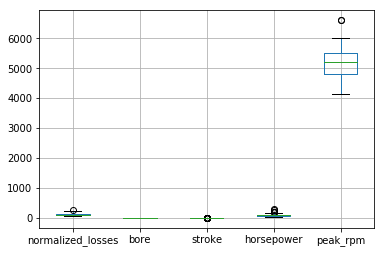

In [14]:
numeric_df.boxplot(['normalized_losses','bore','stroke','horsepower','peak_rpm'])

Se establece que el reemplazo adecuado para estos datos es por la mediana dado que esta no se ve afectada por los valores extremos de los datos, para esto se realiza un ciclo para las variables con datos y se verifica que ya estas no presenten NaN.

In [15]:
for p in ['normalized_losses','bore','stroke','horsepower','peak_rpm','price']:
       numeric_df[p].fillna(numeric_df[p].median(), inplace = True) 

In [16]:
numeric_df.isnull().sum()

symboling            0
normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [17]:
numeric_df.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Exercise 13.2

Split the data into training and testing sets

Train a Random Forest Regressor to predict the price of a car using the nominal features

In [18]:
y = numeric_df['price']
x = numeric_df.drop(['price'], axis=1)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [21]:
R_For = RandomForestRegressor(n_estimators=100,max_depth=None,max_features=None, random_state=1)

In [22]:
R_For.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [23]:
from sklearn import metrics
import numpy as np

In [24]:
y_pred = R_For.predict(X_test)

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1468.1355241935485
MSE: 5002381.975919578
RMSE: 2236.6005400874733


# Exercise 13.3

Create dummy variables for the categorical features

Train a Random Forest Regressor and compare

In [26]:
Xd = pd.get_dummies(obj_df)

In [27]:
Xn = pd.concat([Xd,x], axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.30, random_state=1)

In [29]:
R_For0 = RandomForestRegressor(n_estimators=100,max_depth=None,max_features=None, random_state=1)

In [30]:
R_For0.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [31]:
y_pred = R_For0.predict(X_test)

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1436.0012392473118
MSE: 5014027.610274093
RMSE: 2239.202449595412


Despues de generar las dummy para el modelo notamos que no hay una mayor mejoria dentro de la prediccion resultando ser muy similar a lo observado con aterioridad 

# Exercise 13.4

Apply two other methods of categorical encoding

compare the results

In [33]:
import category_encoders as ce

# BINARY

Se procede a emplear la codificacion binaria y a realizar la regresion

In [34]:
Xbin = ce.BinaryEncoder()

In [35]:
X_bin = Xbin.fit_transform(obj_df, axis=1)

In [36]:
Xnb = pd.concat([X_bin,x], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(Xnb, y, test_size=0.30, random_state=1)

In [38]:
R_For1 = RandomForestRegressor(n_estimators=100,max_depth=None,max_features=None, random_state=1)

In [39]:
R_For1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [40]:
y_pred = R_For1.predict(X_test)

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1434.6472634408603
MSE: 4808281.378566651
RMSE: 2192.77937298002


# POLYNOMIAL 

Se emplea el plynomial encoder y se procede a integrarlo a la base X que ya habiamos generado 

In [42]:
X_poli = ce.PolynomialEncoder()

In [43]:
X_bin = X_poli.fit_transform(obj_df, axis=1)

In [44]:
Xnb = pd.concat([X_bin,x], axis=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(Xnb, y, test_size=0.30, random_state=1)

In [46]:
R_For2 = RandomForestRegressor(n_estimators=100,max_depth=None,max_features=None, random_state=1)

In [47]:
R_For2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [48]:
y_pred = R_For2.predict(X_test)

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1412.1794489247309
MSE: 4595330.5222260645
RMSE: 2143.6722049385407
